In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class KMeans:

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    @staticmethod
    def distance(p1, p2):
        p1 = p1.reshape(p1.shape[0], 1, p1.shape[1])
        p2 = p2.reshape(1, p2.shape[0], p2.shape[1])
        return np.sum((p1 - p2) ** 2, axis = -1)
        
    def fit(self, x):
        random_indices = np.random.choice(len(x), self.n_clusters, replace = False)
        self.cluster_centers_ = x[random_indices]
        # print(self.cluster_centers_)
        #self.cluster_centers_ = np.random.choice(x, self.n_clusters, replace = False)
        
        while True:
            D = self.distance(x, self.cluster_centers_)
          # TODO
            clusters_points = np.argmin(D, axis = 1)
            #https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-1-hot-encoded-numpy-array
            clusters = np.zeros((clusters_points.size, self.n_clusters))
            clusters[np.arange(clusters_points.size), clusters_points] = 1
            weights = clusters.repeat(x.shape[1], axis = 1) + 1e-5
            new_cluster_centers = np.average(np.tile(x, self.n_clusters), axis = 0, weights = weights).reshape(self.n_clusters, -1)

            if np.allclose(new_cluster_centers, self.cluster_centers_):
                break
                
            self.cluster_centers_ = new_cluster_centers
            
        return self
    
    def predict(self, x):
        D = self.distance(x, self.cluster_centers_)
        return D.argmin(axis=1)

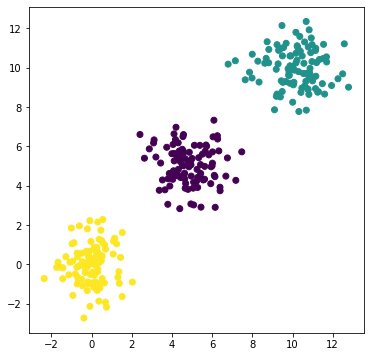

In [ ]:
x = np.concatenate([
                    np.random.normal(size=(100, 2)), 
                    np.random.normal(size=(100, 2)) + 5,
                    np.random.normal(size=(100, 2)) + 10
                    ])
clust = KMeans(3).fit(x).predict(x)

plt.figure(figsize=(6, 6))
plt.scatter(*x.T, c=clust)
plt.show()

In [ ]:
# pip install scikit-image
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import silhouette_score

image = imread('image.png')

# Resize if necessary
image = resize(image, (64, 64), preserve_range=True)

pixels = image.reshape(-1, 4)

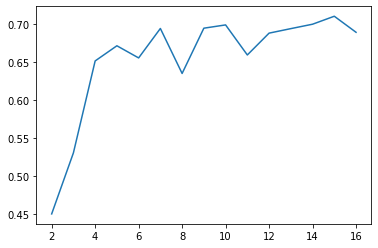

In [ ]:
ks = list(range(2, 17))
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(pixels)
    scores.append(silhouette_score(pixels, kmeans.predict(pixels), metric='euclidean'))
    
plt.plot(
    ks,
    scores
)

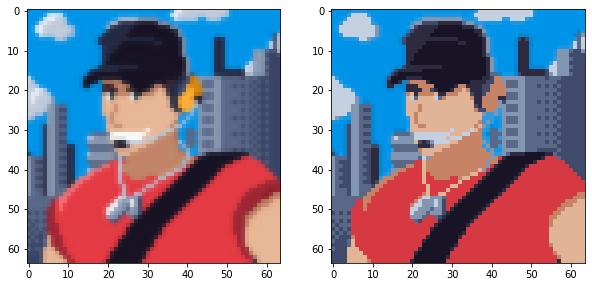

In [ ]:
kmeans = KMeans(n_clusters=13).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(pixels_clustered.reshape(image.shape).astype(np.uint8))

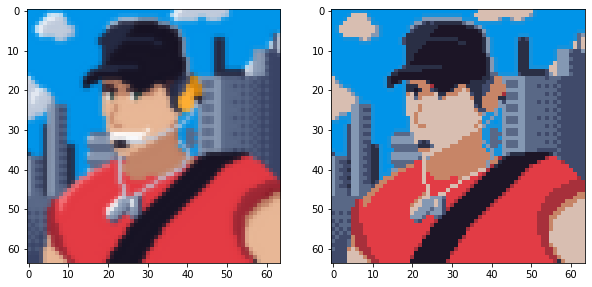

In [ ]:
kmeans = KMeans(n_clusters=11).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(pixels_clustered.reshape(image.shape).astype(np.uint8))

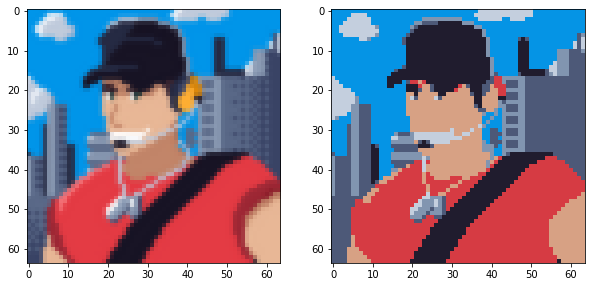

In [ ]:
kmeans = KMeans(n_clusters=7).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(pixels_clustered.reshape(image.shape).astype(np.uint8))

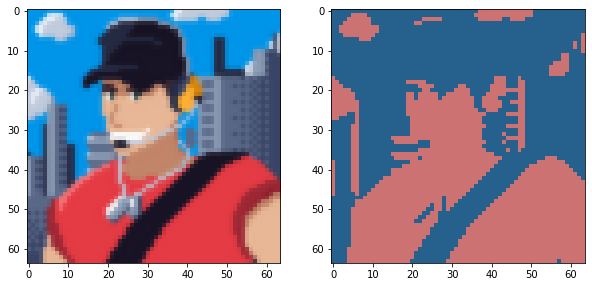

In [ ]:
kmeans = KMeans(n_clusters=2).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(pixels_clustered.reshape(image.shape).astype(np.uint8))

In [3]:
with np.load('mnist.npz') as npz:
    x, y = [npz[k] for k in ['x_train', 'y_train']]

x = x.reshape(-1, 784).astype(np.float32)

In [6]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        
        # TODO
        X_c = X - self.mean_
        C = (X_c.T @ X_c) / (X.shape[0] - 1)
        w, v = np.linalg.eig(C)
        i = (-w).argsort()[:self.n_components]
        
        self.components_ = v[::,i]

        return self
        
    def transform(self, X):
        # TODO
        return (X - X.mean(axis = 0)) @ self.components_

In [7]:
pca = PCA(n_components=2).fit(x)
x_proj = pca.transform(x)

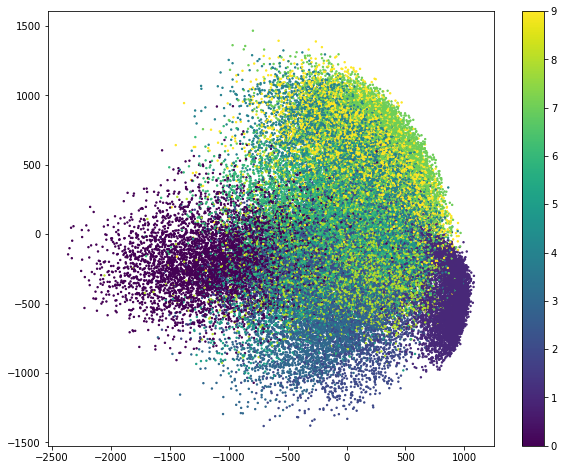

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(*x_proj.T, c=y, s=2)
plt.colorbar()